# Análisis de Datos I 
## Joshua Triana

## Proyecto Final

### Parte 1 - Pregunta Smart

La obesidad en América Latina es un problema multicausal, con algunas aristas tales como la dieta, la cultura, el sedentarismo y factores socioeconómicos, entre otros. Para cualquier estado u organización es preocupante que su población tenga obesidad por los problemas de saluda relacionados tales como enfermedades cardiacas, diabetes y cáncer. Teniendo un conjunto de datos como el que se presenta, se podrían desarrollar modelos supervisados (se tiene la etiqueta de obesidad) para analizar los principales causantes de la obesidad, la relación entre esos causantes y que probabilidad de tener obesidad tiene una persona dados sus hábitos alimenticios y de ejercicio, entre otros. Estos modelos se podrían realizar debido a que se tiene un dataset lo suficiente variado con diferentes campos categóricos y numéricos que permitirían construir modelos de machine learning como los de regresión y clasificación, entre otros.

Pregunta SMART: ¿Cómo se puede desarrollar un modelo de machine learning que identifique patrones de comportamiento asociados con la obesidad en América Latina, utilizando un dataset de consumo alimenticio y actividad física, y tener un modelo operativo en 3 meses?

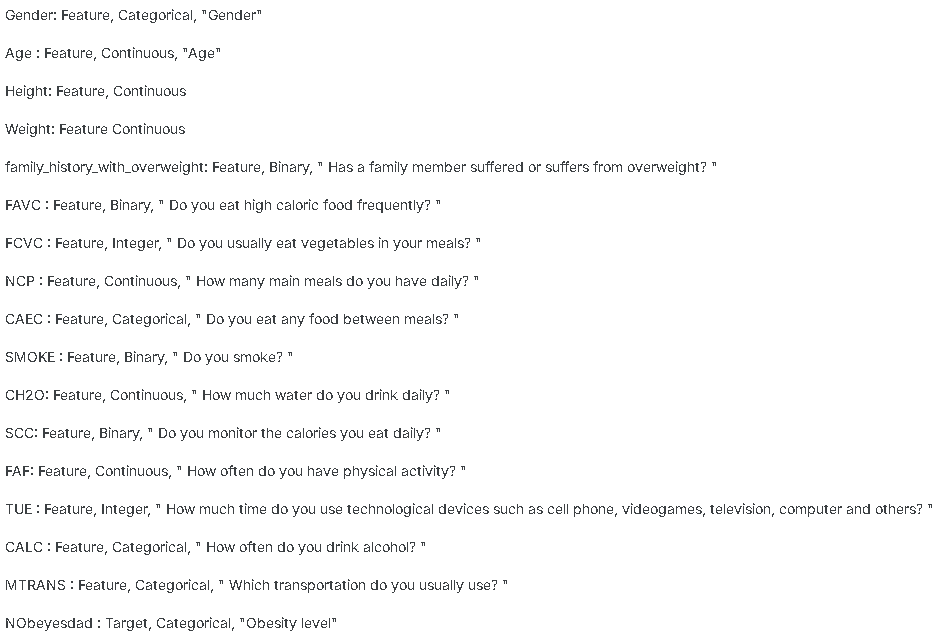

**<p style="text-align: center;">Descripción de variables del dataset</p>**

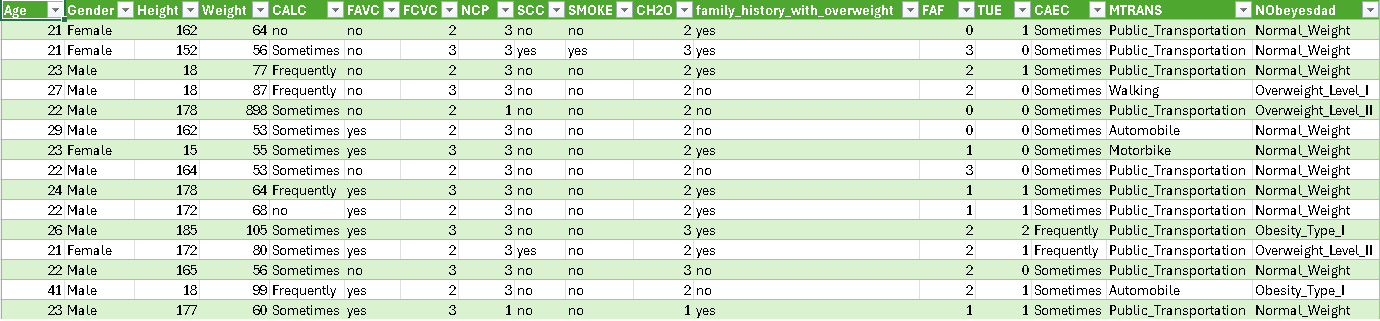

**<p style="text-align: center;">Ejemplo de instancias del dataset</p>**

### Parte 2 - Hallazgos más importantes en los datos

In [1]:
# Librerias
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ruta de archivo 
ruta_archivo = 'ObesityDataSet_raw_and_data_sinthetic.csv'

data = pd.read_csv(ruta_archivo)

In [3]:
# Imprimir información básica sobre el conjunto de datos

print("Información del conjunto de datos:")
print(data.info())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12 

In [4]:
# Estadísticas descriptivas
print(data.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [5]:
# Primeras filas del conjunto de datos
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
#Veamos los valores de el valor a predecir
data["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

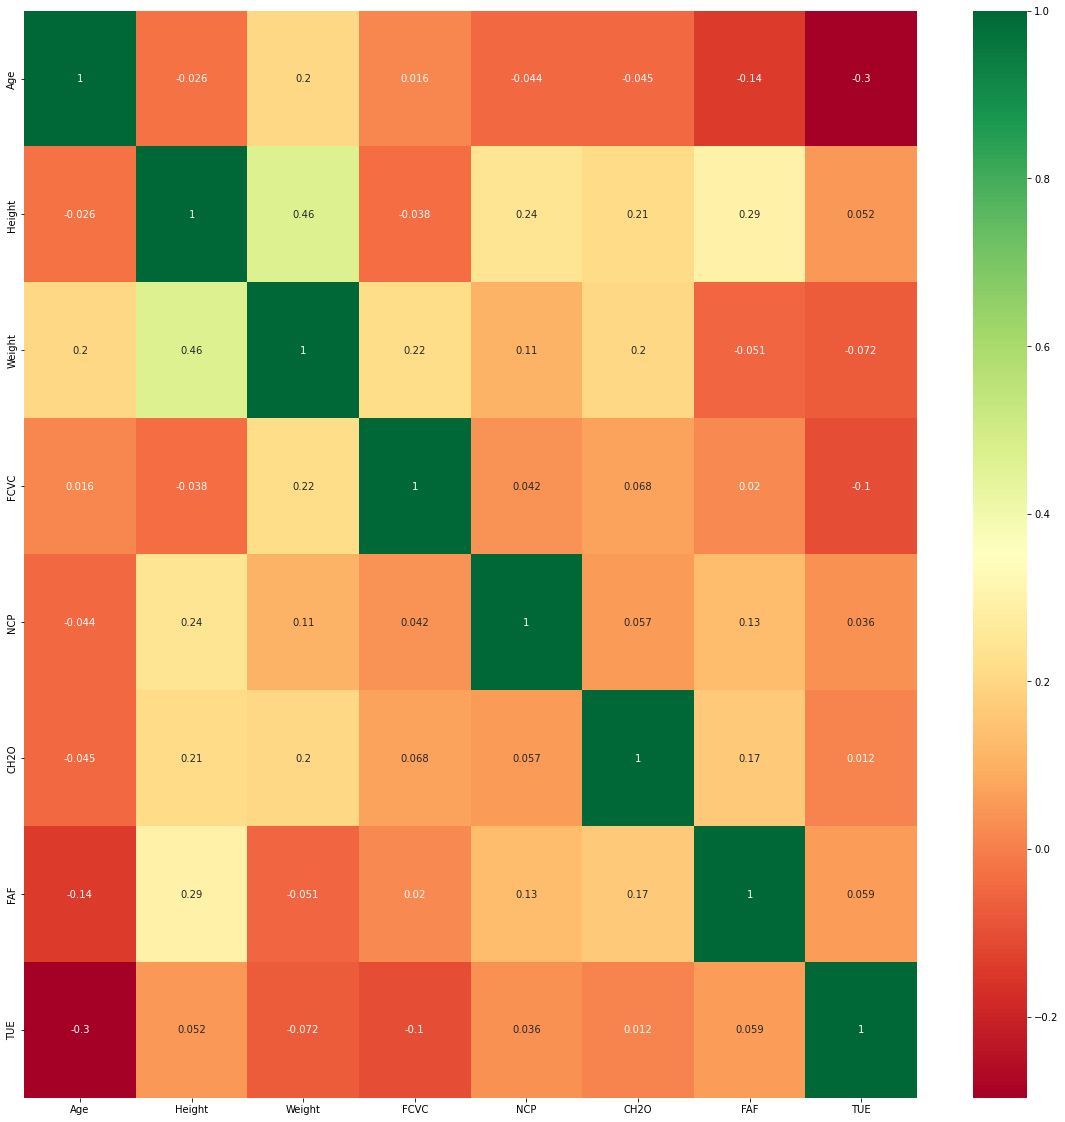

In [7]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

No se ven valores de correlación demasiado altos, razón por la cual decidí no eliminar ninguna columna

El dataset no tiene datos nulos. 
Sin embargo no esta normalizado, tiene datos boleanos y categoricos

In [8]:
from sklearn.preprocessing import LabelEncoder
# Creamos nuestro label encoder
labelencoder = LabelEncoder()
# Transformamos los valores boleanos con label encoding
data['Gender'] = labelencoder.fit_transform(data['Gender'])
data['family_history_with_overweight'] = labelencoder.fit_transform(data['family_history_with_overweight'])
data['FAVC'] = labelencoder.fit_transform(data['FAVC'])
data['SMOKE'] = labelencoder.fit_transform(data['SMOKE'])
data['SCC'] = labelencoder.fit_transform(data['SCC'])

# Veamos como quedó la transformación de los boleanos
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
data = pd.get_dummies(data, columns=['CAEC'], prefix=['CAEC_T'])
data = pd.get_dummies(data, columns=['MTRANS'], prefix=['MTRANS_T'])
data = pd.get_dummies(data, columns=['CALC'], prefix=['CALC_T'])

# Veamos como quedó la transformación del dummy encoding
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_T_no,MTRANS_T_Automobile,MTRANS_T_Bike,MTRANS_T_Motorbike,MTRANS_T_Public_Transportation,MTRANS_T_Walking,CALC_T_Always,CALC_T_Frequently,CALC_T_Sometimes,CALC_T_no
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0,0,0,0,1,0,0,0,0,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0,0,0,0,1,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0,0,0,0,1,0,0,1,0,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0,0,0,0,0,1,0,1,0,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0,0,0,0,1,0,0,0,1,0


In [10]:
from sklearn.preprocessing import LabelBinarizer

# Se extra la variable de salida
y = data['NObeyesdad']

# Este es el tipo de codificación recomendada para las variables categoricas de y
label_encoder = LabelBinarizer()
y_encoded = label_encoder.fit_transform(y)
print(y_encoded)

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


La variable y queda transformada y ya podemos pasar a aplicar nuestro modelo de machine learning

Decidí aplicar un modelo de clasificación, para determinar dadas las características de una persona a que grupo poblacional pertenece. Decidí el método de árboles de decisión por sus buenos resultados (también pude seleccionar la función de random forest).

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

X = data.drop("NObeyesdad", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión
pipe = Pipeline([('paso_estandarizacion', StandardScaler()), ('paso_decision_tree', DecisionTreeClassifier())], verbose = True)

pipe.fit(X_train, y_train)

# mostramos los resultados
print(accuracy_score(y_test, pipe.predict(X_test)))

[Pipeline]  (step 1 of 2) Processing paso_estandarizacion, total=   0.0s
[Pipeline]  (step 2 of 2) Processing paso_decision_tree, total=   0.0s
0.9361702127659575


### Parte 3 - Breve discusión sobre los desafíos técnicos encontrados y cómo los superaste.

La transformación de tantos datos categóricos fue un reto interesante, pues tuve que investigar la correcta forma de
transformar datos boléanos por una parte y categóricos por el otro. También la salida y al ser categórica tenía un tipo de transformación diferente. Estos retos logre superarlos gracias a los ejemplos de clase y la documentación de sklearn. Al final el modelo tuvo una precisión del 94% por ciento, lo que concluyo es un buen indicativo del buen proceso que se hizo en el transcurso de los talleres anteriores